<a href="https://colab.research.google.com/github/JMML2021/Avaluaci-final-per-passar-a-projecte/blob/main/Calculo%20Vueling%202022%20con%20codigos%20Rev%20G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [220]:
# Importar librerias:

import numpy as np
import matplotlib as plt
import pandas as pd
import csv
import seaborn as sns
import datetime
from datetime import timedelta
from colorama import init, Fore, Back, Style


In [221]:
# Ocultando código en jupyter notebook

# https://sebastiandres.github.io/blog/cells-toggle/



def toggle_cell_code(button_id):
    """
    Adds a button to toggle (show/hide) the code cell but not the output. 
    
    Parameters
    ----------
    button_id : str
        An identifier for cells that will hide/show when button is pressed.
    """
    
    from IPython.display import display_html
    my_html = '''
    <button type="button" id="%s" onclick="code_toggle('%s')">Codigo</button>
    <script>
    function code_toggle(my_id) {
        // get the parent element for the cell code and output
        var p = $("#"+my_id);
        if (p.length==0) return;
        while (!p.hasClass("cell")) {
            p = p.parent();
            if (p.prop("tagName") =="body") return;
        }
    // get the cell code and toggle its value
    var cell_code = p.find(".input");
    cell_code.toggle();
    }
    </script>
    ''' %(button_id, button_id)
    return display_html(my_html, raw=True)

# Cargar fichero de # Abrimos los ficheros 

In [222]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [223]:
path='/content/drive/MyDrive/2022.06.03 2022_delay + cierre puertas CORTO.xlsx'

In [224]:
#path= '/content/drive/MyDrive/Ficheros de Vueling/2022.06.03 2022_delay + cierre puertas.xlsx'

In [225]:
# Abrir fichero de Github.
#path='/content/drive/MyDrive/2022.06.03 2022_delay + cierre puertas CORTO.xlsx'
Hoja = 'FLT_2022'

df = pd.read_excel(path, sheet_name=Hoja)


In [226]:
# Los nombre de las columnas tienen muchos espacios en blanco

nombreColumnas= df.columns
nombreColumnas

Index(['DATE                             ', 'FLT    ', 'REG   ', 'AC ', 'DEP',
       'ARR', 'STD  ', 'STA  ', 'TKof ',
       'TDwn                                                      ', 'ATD  ',
       'ATA  ', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX  ', 'LF ',
       'Taxi-out', 'Taxi-In', 'SLOT       ', 'C1', 'DLY1 ', 'Sub1', 'C2',
       'DLY2 ', 'Sub2', 'C3', 'DLY3 ', 'Sub3', 'C4', 'DLY4 ', 'Sub4', 'C1Arr',
       'DLY1Arr', 'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2'],
      dtype='object')

In [227]:
# Aqui corrijo los nombre de las columnas
nombreColumnaCorregido= ['DATE', 'FLT', 'REG', 'AC', 'DEP',
       'ARR', 'STD', 'STA', 'TKof', 'TDwn', 'ATD',
       'ATA', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX', 'LF',
       'Taxi-out', 'Taxi-In', 'SLOT', 'C1', 'DLY1', 'Sub1', 'C2',
       'DLY2', 'Sub2', 'C3', 'DLY3', 'Sub3', 'C4', 'DLY4', 'Sub4', 'C1Arr',
       'DLY1Arr', 'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2']

In [228]:
#@Tiempodel close Pax Door
df['Close Pax Door']

0      2022-01-01 07:58:00.000
1      2022-01-01 09:48:00.000
2      2022-01-01 11:38:00.000
3      2022-01-01 13:18:00.000
4      2022-01-01 15:07:00.000
                ...           
217    2022-01-01 11:40:00.000
218    2022-01-01 14:47:00.000
219    2022-01-01 18:03:00.000
220    2022-01-01 20:42:00.000
221    2022-01-01 10:48:00.000
Name: Close Pax Door, Length: 222, dtype: object

In [229]:
# Proceso para cambiar el nombre de las columnas por un bucle FOR
for n, m in enumerate(nombreColumnas):
  print(n, m,'*',nombreColumnaCorregido[n],'-')
  df.rename({m: nombreColumnaCorregido[n]}, axis=1, inplace=True)

0 DATE                              * DATE -
1 FLT     * FLT -
2 REG    * REG -
3 AC  * AC -
4 DEP * DEP -
5 ARR * ARR -
6 STD   * STD -
7 STA   * STA -
8 TKof  * TKof -
9 TDwn                                                       * TDwn -
10 ATD   * ATD -
11 ATA   * ATA -
12 BLOCK * BLOCK -
13 FLThr * FLThr -
14 DStand * DStand -
15 AStand * AStand -
16 ACT PAX   * ACT PAX -
17 LF  * LF -
18 Taxi-out * Taxi-out -
19 Taxi-In * Taxi-In -
20 SLOT        * SLOT -
21 C1 * C1 -
22 DLY1  * DLY1 -
23 Sub1 * Sub1 -
24 C2 * C2 -
25 DLY2  * DLY2 -
26 Sub2 * Sub2 -
27 C3 * C3 -
28 DLY3  * DLY3 -
29 Sub3 * Sub3 -
30 C4 * C4 -
31 DLY4  * DLY4 -
32 Sub4 * Sub4 -
33 C1Arr * C1Arr -
34 DLY1Arr * DLY1Arr -
35 Close Pax Door * Close Pax Door -
36 Close Cargo Door * Close Cargo Door -
37 Open Cargo/Pax Door * Open Cargo/Pax Door -
38 close pax door2 * close pax door2 -
39 close cargo door2 * close cargo door2 -
40 open cargo/pax door2 * open cargo/pax door2 -


In [230]:
df['Secuencia'] = df.groupby(['DATE', 'REG'])['STD'].rank()
print(df[['Secuencia','STD', 'DEP']][0:4])

   Secuencia       STD  DEP
0        1.0  07:40:00  BIO
1        2.0  09:40:00  SVQ
2        3.0  11:40:00  BIO
3        4.0  13:30:00  SCQ


In [231]:
# Identifico los Aeropuertos principales.

path =(r"/content/drive/MyDrive/Flights Movement 2019-2022 MAR.xlsx")
 
df_Aeropuertos = pd.read_excel(path, sheet_name='Aeropuertos')
df_Aeropuertos = df_Aeropuertos.drop(['Borrar'], axis=1)

#df_Aeropuertos.head

In [232]:
df

,DATE,FLT,REG,AC,DEP,ARR,STD,STA,TKof,TDwn,...,Sub4,C1Arr,DLY1Arr,Close Pax Door,Close Cargo Door,Open Cargo/Pax Door,close pax door2,close cargo door2,open cargo/pax door2,Secuencia
0,2022-01-01,2506,EC-JSY,320,BIO,SVQ,07:40:00,09:05:00,08:10:00,09:17:00,...,,8,00:15:00,2022-01-01 07:58:00.000,2022-01-01 07:31:00.000,2022-01-01 09:23:00.000,07:58,07:31,09:23,1.0
1,2022-01-01,2505,EC-JSY,320,SVQ,BIO,09:40:00,11:05:00,10:03:00,11:07:00,...,,8,00:04:00,2022-01-01 09:48:00.000,2022-01-01 09:46:00.000,2022-01-01 11:11:00.000,09:48,09:46,11:11,2.0
2,2022-01-01,1386,EC-JSY,320,BIO,SCQ,11:40:00,12:50:00,11:50:00,12:40:00,...,,,NaN,2022-01-01 11:38:00.000,2022-01-01 11:34:00.000,2022-01-01 12:46:00.000,11:38,11:34,12:46,3.0
3,2022-01-01,1387,EC-JSY,320,SCQ,BIO,13:30:00,14:35:00,13:30:00,14:08:00,...,,,NaN,2022-01-01 13:18:00.000,2022-01-01 13:06:00.000,2022-01-01 14:12:00.000,13:18,13:06,14:12,4.0
4,2022-01-01,3262,EC-JSY,320,BIO,TFN,15:15:00,18:20:00,15:23:00,18:07:00,...,,,NaN,2022-01-01 15:07:00.000,2022-01-01 15:01:00.000,2022-01-01 18:14:00.000,15:07,15:01,18:14,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2022-01-01,1898,EC-MKO,32A,BCN,DUS,11:45:00,14:00:00,11:55:00,13:45:00,...,,,NaN,2022-01-01 11:40:00.000,2022-01-01 11:41:00.000,2022-01-01 13:51:00.000,11:40,11:41,13:51,1.0
218,2022-01-01,1899,EC-MKO,32A,DUS,BCN,14:40:00,16:50:00,15:02:00,16:50:00,...,,8,00:04:00,2022-01-01 14:47:00.000,2022-01-01 14:40:00.000,2022-01-01 16:56:00.000,14:47,14:40,16:56,2.0
219,2022-01-01,8462,EC-MKO,32A,BCN,LIS,17:55:00,19:55:00,18:39:00,20:15:00,...,,8,00:24:00,2022-01-01 18:03:00.000,2022-01-01 18:01:00.000,2022-01-01 20:20:00.000,18:03,18:01,20:20,3.0
220,2022-01-01,8463,EC-MKO,32A,LIS,BCN,20:40:00,22:35:00,20:58:00,22:25:00,...,,8,00:03:00,2022-01-01 20:42:00.000,2022-01-01 20:41:00.000,2022-01-01 22:38:00.000,20:42,20:41,22:38,4.0


In [233]:
df.columns

Index(['DATE', 'FLT', 'REG', 'AC', 'DEP', 'ARR', 'STD', 'STA', 'TKof', 'TDwn',
       'ATD', 'ATA', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX', 'LF',
       'Taxi-out', 'Taxi-In', 'SLOT', 'C1', 'DLY1', 'Sub1', 'C2', 'DLY2',
       'Sub2', 'C3', 'DLY3', 'Sub3', 'C4', 'DLY4', 'Sub4', 'C1Arr', 'DLY1Arr',
       'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2',
       'Secuencia'],
      dtype='object')

In [234]:
# Convierto todas las columnas de tiempo en un formato correcto

formato = "%H:%M:%S"


def convertirTiempo(clave):
    df[clave] = pd.to_datetime(df[clave],
                               format=formato,
                               errors='coerce')

'''
columnasConvertir = ['DATE', 'STD', 'STA', 'TKof', 'TDwn', 'ATD', 'ATA', 'BLOCK', 'FLThr', 
                     'DLY1Arr','close pax door2', 'close cargo door2', 'open cargo/pax door2',
                     'SLOT', 'DLY1', 'DLY2']
'''
columnasConvertir = ['DATE', 'STD', 'STA', 'TKof', 'TDwn', 'ATD', 'ATA', 'BLOCK', 'FLThr', 
                     
               ]

for x in columnasConvertir:
    convertirTiempo(x)


In [235]:
#Subrutina que suma las fechas con las horas.

def adecuarFechas(fecha, tiempoClave):
    clave = "Date_" + tiempoClave
    print('.....Clave: ',clave, '....', fecha, tiempoClave)     
    df[tiempoClave] = pd.to_datetime(df[tiempoClave], format='%H:%M', errors='coerce')       
    
    df[tiempoClave] = pd.to_datetime( df[fecha].dt.strftime('%d/%m/%Y') + ' ' + df[tiempoClave].dt.strftime('%H:%M:%S'))

In [236]:
df['STD']

0     1900-01-01 07:40:00
1     1900-01-01 09:40:00
2     1900-01-01 11:40:00
3     1900-01-01 13:30:00
4     1900-01-01 15:15:00
              ...        
217   1900-01-01 11:45:00
218   1900-01-01 14:40:00
219   1900-01-01 17:55:00
220   1900-01-01 20:40:00
221   1900-01-01 11:00:00
Name: STD, Length: 222, dtype: datetime64[ns]

In [237]:
df1=df.copy()
print(df['STD'].head())
columnasAddDate= ['STD', 'STA', 'TKof', 'TDwn', 'ATD', 'ATA', 'BLOCK', 'FLThr',
                  'close pax door2', 'close cargo door2']
 
for x in columnasAddDate:    
    adecuarFechas('DATE', x)


0   1900-01-01 07:40:00
1   1900-01-01 09:40:00
2   1900-01-01 11:40:00
3   1900-01-01 13:30:00
4   1900-01-01 15:15:00
Name: STD, dtype: datetime64[ns]
.....Clave:  Date_STD .... DATE STD
.....Clave:  Date_STA .... DATE STA
.....Clave:  Date_TKof .... DATE TKof
.....Clave:  Date_TDwn .... DATE TDwn
.....Clave:  Date_ATD .... DATE ATD
.....Clave:  Date_ATA .... DATE ATA
.....Clave:  Date_BLOCK .... DATE BLOCK
.....Clave:  Date_FLThr .... DATE FLThr
.....Clave:  Date_close pax door2 .... DATE close pax door2
.....Clave:  Date_close cargo door2 .... DATE close cargo door2


In [238]:
#Añado eL mes

df['MES'] = df['STD'].dt.month

# Convierto todas las columnas de tiempo en un formato correcto

# Identificacion de los principales Aeropuertos

In [239]:
AeropuertosCantidad['cantitat'] = df['DEP'].value_counts()

In [240]:
# Sapigue quants vols han sortit de cada aeroport 

AeropuertosCantidad['cantitat'] = df['DEP'].value_counts()

AeropuertosCantidad['cantitat'].sort_values
AeropuertosCantidad=AeropuertosCantidad.sample(n=6, replace=True)
AeropuertosCantidad.columns=['Aeroport', 'cantitat']
AeropuertosCantidad.shape

(6,)

In [241]:
AeropuertosCantidad.columns

['Aeroport', 'cantitat']

In [242]:
AeropuertosCantidad.head()

LTN                                                         1
cantitat    BCN    67
PMI    13
AGP    10
SVQ     9
ORY   ...
LTN                                                         1
NUE                                                        89
NUE                                                        89
Name: DEP, dtype: object

In [243]:
AeropuertosCantidad.shape

(6,)

In [244]:
df= pd.merge(df,df_Aeropuertos, left_on= 'DEP', right_on='Dep')

df= pd.merge(df,df_Aeropuertos, left_on= 'ARR', right_on='Dep')


df= df.rename({'AeropuertoKey1_x': 'Aeropuerto_Key', 'AeropuertoKey1_y': 'AeropuertoKey1'}, axis=1)

df= df.sort_values(['DATE', 'REG', 'STD'])
df= df.reset_index(drop=True)
borrarColumnas = ['Dep_x', 'Dep_y']
df = df.drop(borrarColumnas, axis=1)
df.head(4)

,DATE,FLT,REG,AC,DEP,ARR,STD,STA,TKof,TDwn,...,Close Pax Door,Close Cargo Door,Open Cargo/Pax Door,close pax door2,close cargo door2,open cargo/pax door2,Secuencia,MES,Aeropuerto_Key,AeropuertoKey1
0,2022-01-01,2506,EC-JSY,320,BIO,SVQ,2022-01-01 07:40:00,2022-01-01 09:05:00,2022-01-01 08:10:00,2022-01-01 09:17:00,...,2022-01-01 07:58:00.000,2022-01-01 07:31:00.000,2022-01-01 09:23:00.000,2022-01-01 07:58:00,2022-01-01 07:31:00,09:23,1.0,1,BIO,SVQ
1,2022-01-01,2505,EC-JSY,320,SVQ,BIO,2022-01-01 09:40:00,2022-01-01 11:05:00,2022-01-01 10:03:00,2022-01-01 11:07:00,...,2022-01-01 09:48:00.000,2022-01-01 09:46:00.000,2022-01-01 11:11:00.000,2022-01-01 09:48:00,2022-01-01 09:46:00,11:11,2.0,1,SVQ,BIO
2,2022-01-01,1386,EC-JSY,320,BIO,SCQ,2022-01-01 11:40:00,2022-01-01 12:50:00,2022-01-01 11:50:00,2022-01-01 12:40:00,...,2022-01-01 11:38:00.000,2022-01-01 11:34:00.000,2022-01-01 12:46:00.000,2022-01-01 11:38:00,2022-01-01 11:34:00,12:46,3.0,1,BIO,SCQ
3,2022-01-01,1387,EC-JSY,320,SCQ,BIO,2022-01-01 13:30:00,2022-01-01 14:35:00,2022-01-01 13:30:00,2022-01-01 14:08:00,...,2022-01-01 13:18:00.000,2022-01-01 13:06:00.000,2022-01-01 14:12:00.000,2022-01-01 13:18:00,2022-01-01 13:06:00,14:12,4.0,1,SCQ,BIO


# Calculo tiempo en vuelo 1

In [245]:
df.columns
#print(df['Close Pax Door'])

Index(['DATE', 'FLT', 'REG', 'AC', 'DEP', 'ARR', 'STD', 'STA', 'TKof', 'TDwn',
       'ATD', 'ATA', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX', 'LF',
       'Taxi-out', 'Taxi-In', 'SLOT', 'C1', 'DLY1', 'Sub1', 'C2', 'DLY2',
       'Sub2', 'C3', 'DLY3', 'Sub3', 'C4', 'DLY4', 'Sub4', 'C1Arr', 'DLY1Arr',
       'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2',
       'Secuencia', 'MES', 'Aeropuerto_Key', 'AeropuertoKey1'],
      dtype='object')

In [246]:
# Calulo tiempo de vuelo teorico Real y error
df['DuracionVueloTeorico']= (df['STA'] - df['STD'])/  np.timedelta64(1, 'm') 
df['DuracionVueloReal'] = (df['ATA'] - df['ATD']) /  np.timedelta64(1, 'm') 
df['E_Duracion_Vuelo'] = (df['DuracionVueloReal'] - df['DuracionVueloTeorico']) #/  np.timedelta64(1, 'm') 
df['E_Duracion_Vuelo'].head(3)

0   -5.0
1   -7.0
2   -5.0
Name: E_Duracion_Vuelo, dtype: float64

# Tiempo Close Pax y Close Cargo Door

In [247]:
df['Close Pax Door'] =pd.to_datetime(df['Close Pax Door'])
print(df['Close Pax Door'].head(4))
print('-----------------')
print(df1['ATD'].head(4))

0   2022-01-01 07:58:00
1   2022-01-01 09:48:00
2   2022-01-01 11:38:00
3   2022-01-01 13:18:00
Name: Close Pax Door, dtype: datetime64[ns]
-----------------
0   1900-01-01 08:00:00
1   1900-01-01 09:51:00
2   1900-01-01 11:40:00
3   1900-01-01 13:23:00
Name: ATD, dtype: datetime64[ns]


In [248]:
df['Close Pax Door'] =pd.to_datetime(df['Close Pax Door'])
df['t_ClosePax'] =   (df['Close Pax Door'] - df['ATD']) /  np.timedelta64(1, 'm') 
df['t_ClosePax']

0      -2.0
1      -3.0
2      -2.0
3      -5.0
4       0.0
       ... 
217    -2.0
218     0.0
219   -20.0
220    -5.0
221    -9.0
Name: t_ClosePax, Length: 222, dtype: float64

In [249]:
#df['Retardo_Abrir_Puerta_Pax']= df['Open Cargo/Pax Door']-df['ATA']
#df['Retardo_Abrir_Puerta_Pax']

In [250]:
df ['Close Cargo Door']=pd.to_datetime(df ['Close Cargo Door'])
df['t_Close_Cargo_Door'] = (df ['Close Cargo Door'] - df['ATD']) /  np.timedelta64(1, 'm') 

df['Close Pax Door'] =pd.to_datetime(df['Close Pax Door'])
df ['Close Cargo Door']=pd.to_datetime(df ['Close Cargo Door'])

df['Open Cargo/Pax Door'] =pd.to_datetime(df['Open Cargo/Pax Door'])

df['t_Entre_Puertas'] = (df ['Close Cargo Door'] - df['Close Pax Door']) /  np.timedelta64(1, 'm') 

#
#df[[ 't_ClosePax','t_Close_Cargo_Door', 't_Entre_Puertas', 'Open Cargo/Pax Door']]##.head(4)




In [251]:
df['Retardo_Abrir_Puerta_Pax']= df['Open Cargo/Pax Door']-df['ATA']
df[['Retardo_Abrir_Puerta_Pax', 'Open Cargo/Pax Door','ATA']]

,Retardo_Abrir_Puerta_Pax,Open Cargo/Pax Door,ATA
0,0 days 00:03:00,2022-01-01 09:23:00,2022-01-01 09:20:00
1,0 days 00:02:00,2022-01-01 11:11:00,2022-01-01 11:09:00
2,0 days 00:01:00,2022-01-01 12:46:00,2022-01-01 12:45:00
3,0 days 00:01:00,2022-01-01 14:12:00,2022-01-01 14:11:00
4,0 days 00:00:00,2022-01-01 18:14:00,2022-01-01 18:14:00
...,...,...,...
217,0 days 00:00:00,2022-01-01 13:51:00,2022-01-01 13:51:00
218,0 days 00:02:00,2022-01-01 16:56:00,2022-01-01 16:54:00
219,0 days 00:01:00,2022-01-01 20:20:00,2022-01-01 20:19:00
220,0 days 00:00:00,2022-01-01 22:38:00,2022-01-01 22:38:00


In [252]:
df['t_Close_Cargo_Door']

0     -29.0
1      -5.0
2      -6.0
3     -17.0
4      -6.0
       ... 
217    -1.0
218    -7.0
219   -22.0
220    -6.0
221    -7.0
Name: t_Close_Cargo_Door, Length: 222, dtype: float64

In [253]:
# Estudio los trayectos.
condicion = [(df['DEP'] < df['ARR']),  (df['ARR'] < df['DEP'])]

valores = [  (df['DEP'] + '-' + df['ARR']),  (df['ARR'] + '-' + df['DEP'])]

df['Trayecto'] = np.select(condicion, valores ) 
df['Trayecto'].head(4)

#df5 = df.where('Departure' > 'Arrival',  'Departure' + 'Arrival',  'Arrival' +'Departure')

0    BIO-SVQ
1    BIO-SVQ
2    BIO-SCQ
3    BIO-SCQ
Name: Trayecto, dtype: object

In [254]:
# Creo la secuencia de vuelos de cada avión cada día

df['Secuencia'] = df.groupby(['DATE', 'REG'])['STD'].rank()


df1=df
df1.head(2)



,DATE,FLT,REG,AC,DEP,ARR,STD,STA,TKof,TDwn,...,Aeropuerto_Key,AeropuertoKey1,DuracionVueloTeorico,DuracionVueloReal,E_Duracion_Vuelo,t_ClosePax,t_Close_Cargo_Door,t_Entre_Puertas,Retardo_Abrir_Puerta_Pax,Trayecto
0,2022-01-01,2506,EC-JSY,320,BIO,SVQ,2022-01-01 07:40:00,2022-01-01 09:05:00,2022-01-01 08:10:00,2022-01-01 09:17:00,...,BIO,SVQ,85.0,80.0,-5.0,-2.0,-29.0,-27.0,0 days 00:03:00,BIO-SVQ
1,2022-01-01,2505,EC-JSY,320,SVQ,BIO,2022-01-01 09:40:00,2022-01-01 11:05:00,2022-01-01 10:03:00,2022-01-01 11:07:00,...,SVQ,BIO,85.0,78.0,-7.0,-3.0,-5.0,-2.0,0 days 00:02:00,BIO-SVQ


In [255]:
# Analizo el retardo en el despegue:
def dibujarScatter( ejeX, ejeY):
    x= df1[ejeX]
    y = df1[ejeY]    
    ax = sns.scatterplot(x , y )



# Puntualidad media primer despegue en el 2019!

¿


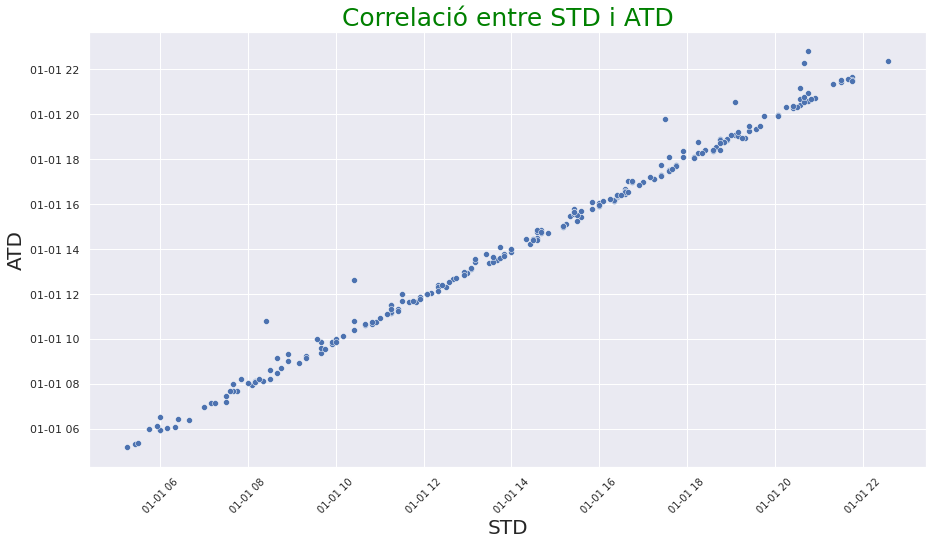

In [256]:
 #@title
 #Grafico de correlacion

import matplotlib.pyplot as plt
plt.figure(figsize = (15,8))
ax = sns.scatterplot( x=df1['STD'], y=df1['ATD'])
ax.set_title('Correlació entre STD i ATD', fontsize=25, color='green')
ax.set_xlabel("STD", fontsize = 20)
ax.set_ylabel("ATD", fontsize = 20)

plt.xticks(rotation=45,  fontsize=10)
print('¿')

# Calculo error del primer despegue.

In [328]:
# Filtro primer despegue

vuelosPrimerDespegue= (df1['Secuencia']== 1)
df2 = df1[vuelosPrimerDespegue]
print(df2[['DATE','REG', 'Secuencia','STD']][0:8])


         DATE     REG  Secuencia                 STD
0  2022-01-01  EC-JSY        1.0 2022-01-01 07:40:00
6  2022-01-01  EC-JZI        1.0 2022-01-01 07:30:00
12 2022-01-01  EC-KDG        1.0 2022-01-01 14:20:00
16 2022-01-01  EC-KDH        1.0 2022-01-01 07:50:00
21 2022-01-01  EC-KDX        1.0 2022-01-01 17:35:00
24 2022-01-01  EC-KLB        1.0 2022-01-01 05:25:00
29 2022-01-01  EC-KLT        1.0 2022-01-01 07:30:00
33 2022-01-01  EC-KMI        1.0 2022-01-01 12:05:00


In [329]:

#Calculo error despegue:
'''
vuelosPrimerDespegue= (df1['Secuencia']== 1)
df2 = df1[vuelosPrimerDespegue]

df2['E_Despegue'] = (df2['Date_ATD']- df2['Date_STD']) /  np.imedelta64(1, 'm')


#df2['E_Despegue']=df2['E_Despegue'].np.time

df2['E_Despegue'].head(8)
print(df2[['DATE','REG', 'E_Despegue', 'Date_ATD', 'Date_STD']][0:8])
#sns.histplot(data= df1.E_Despegue, kde= True)
'''

"\nvuelosPrimerDespegue= (df1['Secuencia']== 1)\ndf2 = df1[vuelosPrimerDespegue]\n\ndf2['E_Despegue'] = (df2['Date_ATD']- df2['Date_STD']) /  np.imedelta64(1, 'm')\n\n\n#df2['E_Despegue']=df2['E_Despegue'].np.time\n\ndf2['E_Despegue'].head(8)\nprint(df2[['DATE','REG', 'E_Despegue', 'Date_ATD', 'Date_STD']][0:8])\n#sns.histplot(data= df1.E_Despegue, kde= True)\n"

In [332]:
#Calculo error primer despegue despegue:

df1['E_Despegue'] = (df1['ATD']- df1['STD']) /  np.timedelta64(1, 'm')

 
df1['E_Despegue'].head()
 

#print(df1['E_Despegue'][0], '-----', df1['Date_ATD'][0], '........', df1['Date_STD'][0])
#print(df1[['DATE','REG', 'E_Despegue', 'Date_ATD', 'Date_STD']][0:8])

print(df2[['DATE','REG', 'Secuencia','STD', 'ATD','E_Despegue']][0:8])

print('\nMedia = ', df1['E_Despegue'].mean())

         DATE     REG  Secuencia                 STD                 ATD  \
0  2022-01-01  EC-JSY        1.0 2022-01-01 07:40:00 2022-01-01 08:00:00   
6  2022-01-01  EC-JZI        1.0 2022-01-01 07:30:00 2022-01-01 07:12:00   
12 2022-01-01  EC-KDG        1.0 2022-01-01 14:20:00 2022-01-01 14:27:00   
16 2022-01-01  EC-KDH        1.0 2022-01-01 07:50:00 2022-01-01 08:13:00   
21 2022-01-01  EC-KDX        1.0 2022-01-01 17:35:00 2022-01-01 17:31:00   
24 2022-01-01  EC-KLB        1.0 2022-01-01 05:25:00 2022-01-01 05:20:00   
29 2022-01-01  EC-KLT        1.0 2022-01-01 07:30:00 2022-01-01 07:29:00   
33 2022-01-01  EC-KMI        1.0 2022-01-01 12:05:00 2022-01-01 12:01:00   

    E_Despegue  
0         20.0  
6        -18.0  
12         7.0  
16        23.0  
21        -4.0  
24        -5.0  
29        -1.0  
33        -4.0  

Media =  2.77027027027027


Text(0.5, 0, 'Error (minuts)')

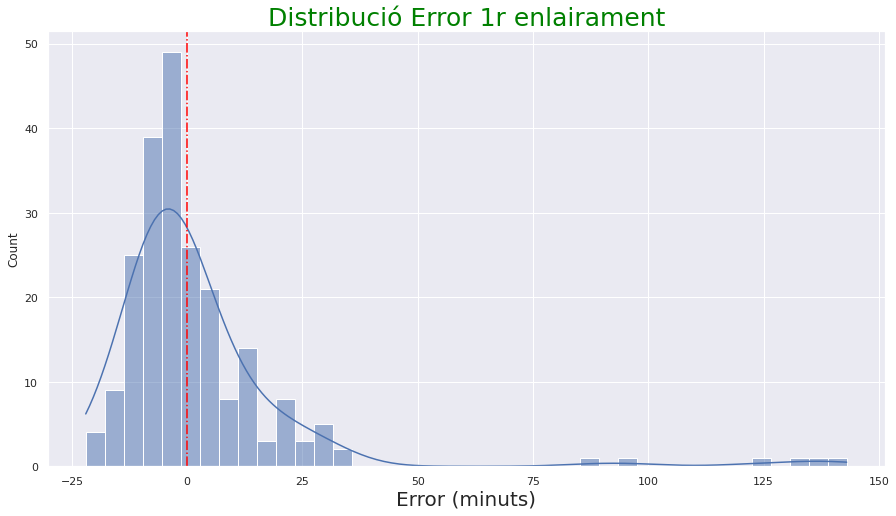

In [331]:
plt.figure(figsize = (15,8))
p= sns.histplot(data= df1.E_Despegue, kde= True)
p.axvline(x = 0, ymin=0, ymax= 12, color='red', linestyle= 'dashdot') # Objetivo
p.set_title('Distribució Error 1r enlairament', fontsize=25, color='green')
p.set_xlabel("Error (minuts)", fontsize = 20)

Del gràfic veiem que clarament no és normal i que té moltes dades que no són normals. És una corba, clarament no gaussiana, descentrada capa la dreta.

¿Per què tenim aquest outliers?.

 Les raons són situacions extraordinàries, totalment aleatòries, i que requereixen una anàlisi per si mateix, però que amb les dades que tinc no em permet estudiar. Per exemple pot ser motiu d'una avaria d'un motor, una vaga, un passatger que ha perdut el vol i que no es documenta correctament el motiu del retard.

 
**Acció** Eliminarem totes les dades que són o més grans o més petites de 30 minuts. 

30 minuts el considerem un temps prudencial molt gran i que ha provocat un canvi de SLOT per part del Controlador Aeri

# Hi ha molta dispersió i hem de filtrar les dades a:
## error de sortida > 30 i < 30 i és el 1r enlairament


Mitjana filtrada =  -1.44 minuts


Text(0.5, 0, 'Error (minuts)')

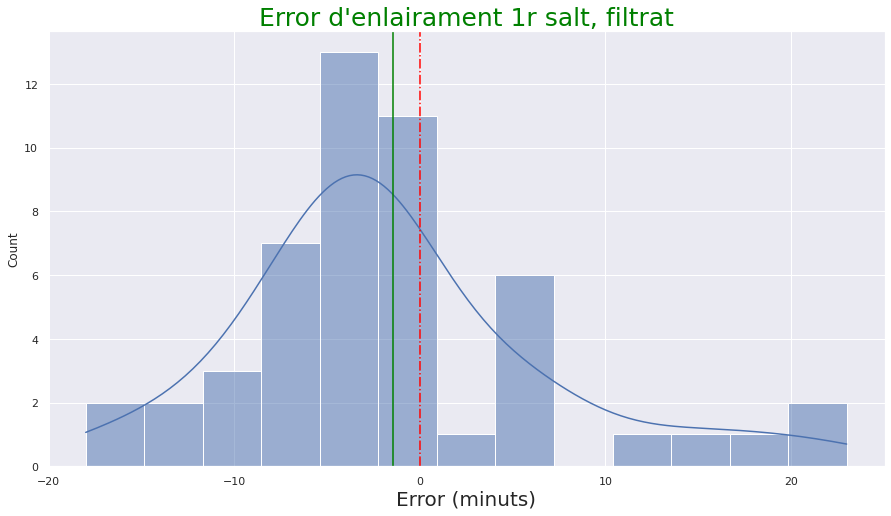

In [261]:
# Eliminar los outliers
df2=df.copy()
dfEliminarOutliers= ((df2['Secuencia']== 1) & (df2['E_Despegue']< 30) & (df2['E_Despegue']> -30))

df2 = df[dfEliminarOutliers]
#
plt.figure(figsize = (15,8))
p= sns.histplot(data= df2.E_Despegue, kde= True)
p.set_title("Error d'enlairament 1r salt, filtrat", fontsize=25, color='green')
mediaFiltrada = round(df2['E_Despegue'].mean(),2)
p.axvline(mediaFiltrada, 0,12, color = 'green')                       # Media real
p.axvline(x = 0, ymin=0, ymax= 12, color='red', linestyle= 'dashdot') # Objetivo
print()
print('Mitjana filtrada = ', mediaFiltrada, 'minuts')
#print(df2[['Secuencia', 'E_Despegue', 'AeropuertoKey1' ]]) 
p.set_xlabel("Error (minuts)", fontsize = 20)

Puntualidad BCN en el 1r enlairament: -3.72


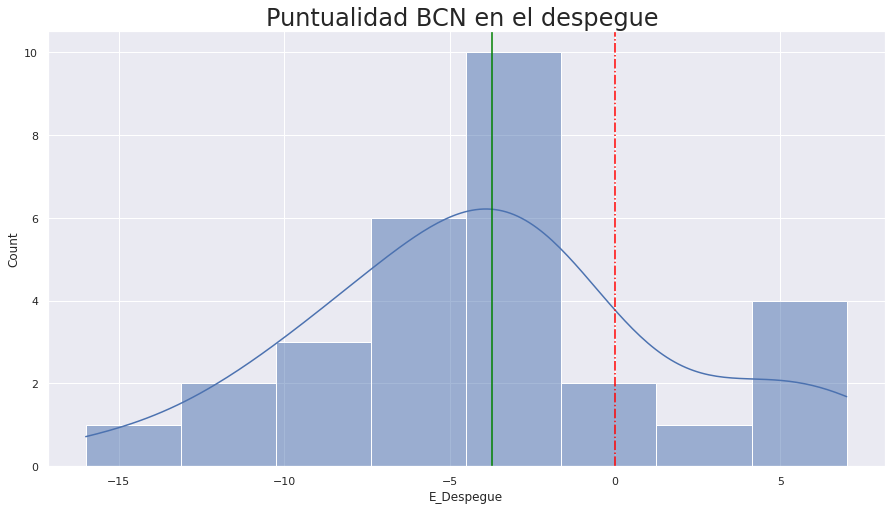

In [262]:
# Para saber la puntualidad solo de Barcelona
df2barcelonaPuntualida = (df2['DEP']== 'BCN')


df2BarcelonaPuntualida = df2[df2barcelonaPuntualida]
df2barcelonaPuntualida.head()

plt.figure(figsize = (15,8))
#df2BarcelonaPuntualida.head()
puntualidadBCN = round((df2BarcelonaPuntualida['E_Despegue'].mean()),2)#
print('Puntualidad BCN en el 1r enlairament:' , puntualidadBCN )
#print(df2BarcelonaPuntualida[[ 'DATE',   'FLT',     'REG',  'AC', 'DEP',  'ARR']] )
p=sns.histplot(data= df2BarcelonaPuntualida.E_Despegue, kde= True).set_title('Puntualidad BCN en el despegue ', fontsize = 24)


#Linea d'objectius 
plt.axvline(puntualidadBCN, 0,12, color = 'green')                       # Media real
plt.axvline(x = 0, ymin=0, ymax= 12, color='red', linestyle= 'dashdot') # Objetivo
#ax.set_title('Puntualidad principales aeropuertos en el 1 Despegue:', fontsize = 24)
 

Text(0.5, 1.0, 'Puntualidad principales aeropuertos en el 1 Despegue:')

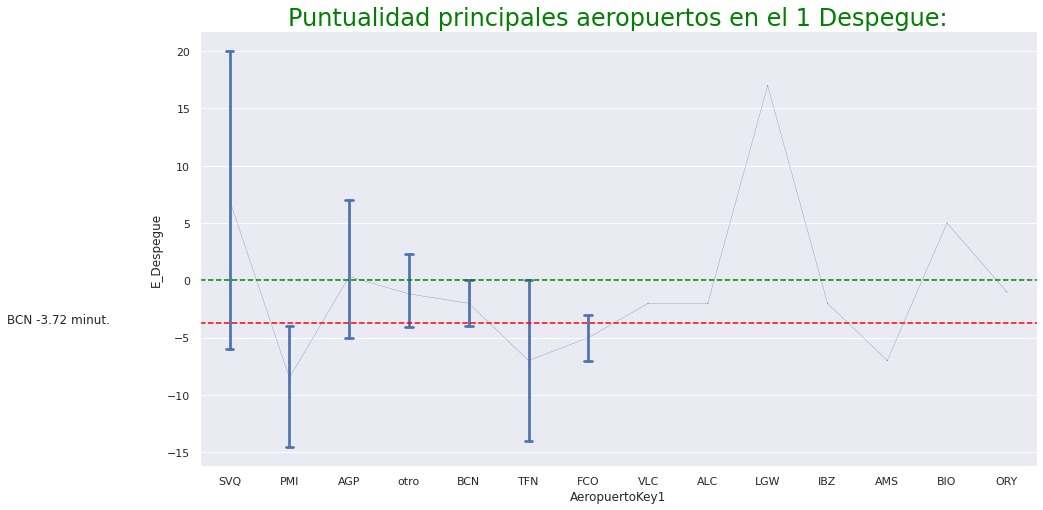

In [263]:
# Intervalos de Confianza por aeropuerto

sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='AeropuertoKey1', y = "E_Despegue", data= df2, scale=.1, kind = "point", capsize=0.13)

ax.axhline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN "+ str(puntualidadBCN) + ' minut.'
ax.text(puntualidadBCN ,puntualidadBCN , textoBCN, backgroundcolor='w')

ax.set_title('Puntualidad principales aeropuertos en el 1 Despegue:', fontsize = 24, color= 'green')

# tiempo 'Close Cargo Door'  -   'Close Pax'


Media filtrada =  -8.19 minutos
N=  2862
vegadas s'ha tanca >0 mint:  34
Count of values greater than 20 in Column F :  1
 El porcentatge es de: 0.03


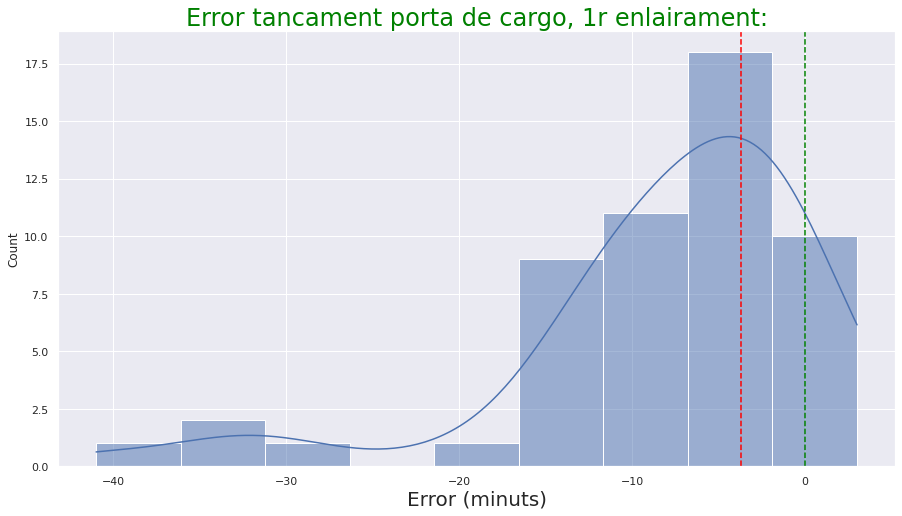

In [264]:
#t_Close_Cargo_Door

dfEliminarOutliers= ((df1['Secuencia']== 1) & (df1['t_Close_Cargo_Door']< 120) & (df1['t_Close_Cargo_Door']> -130))

df2 = df[dfEliminarOutliers]
#df2 = df2[dfEliminarOutliers]


ax=sns.histplot(data= df2.t_Close_Cargo_Door, kde= True)

media = round(df2['t_Close_Cargo_Door'].mean(),2)
print()
print('Media filtrada = ', media , 'minutos')
 
ax.axvline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')
ax.set_title('Error tancament porta de cargo, 1r enlairament:', fontsize = 24, color= 'green')
ax.set_xlabel("Error (minuts)", fontsize = 20)
tamañoDF = df2.size
print('N= ', tamañoDF)
cantidadCierresCargo= df2[df2['t_Close_Cargo_Door'] > -10].count() # Cantitat de vegadas la porta de carga es tanca > 0



 
print("vegadas s'ha tanca >0 mint: ",str(cantidadCierresCargo['DATE']))

countMalos = np.count_nonzero(df2['t_Close_Cargo_Door'] > 0)
print('Count of values greater than 20 in Column F : ', countMalos)

porcentaje = round(countMalos/tamañoDF*100,2)

print(' El porcentatge es de:', porcentaje)

# tiempo  'tiempo Close Pax'  -   'ATD'


Media filtrada =  -4.06 minutos


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Text(0.5, 1.0, 'Error tancament porta Pax, 1r enlairament:')

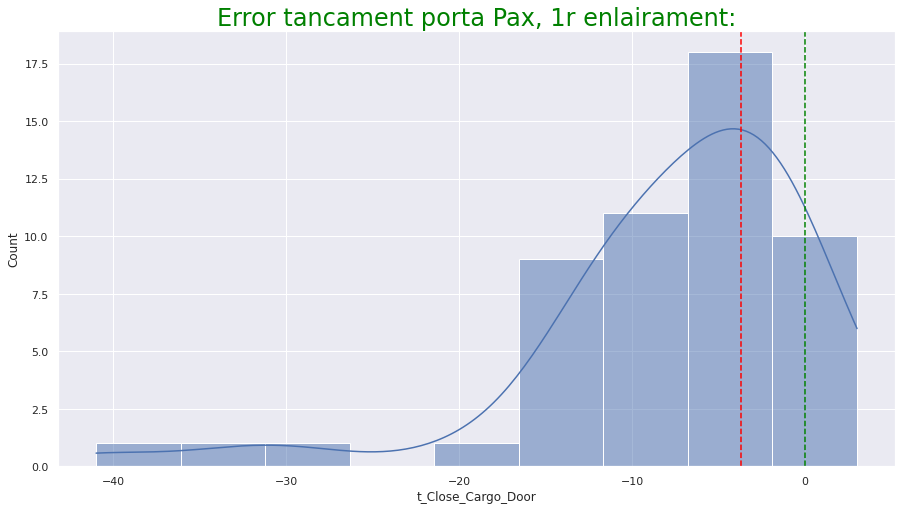

In [265]:
#t_Close_Cargo_Door

dfEliminarOutliers= ((df1['Secuencia']== 1) & (df1['t_ClosePax']< 30) & (df1['t_ClosePax']> -30))

df2 = df2[dfEliminarOutliers] 

ax=sns.histplot(data= df2.t_Close_Cargo_Door, kde= True)

media = round(df2['t_ClosePax'].mean(),2)
print()
print('Media filtrada = ', media , 'minutos')
 
ax.axvline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')
ax.set_title('Error tancament porta Pax, 1r enlairament:', fontsize = 24, color= 'green')

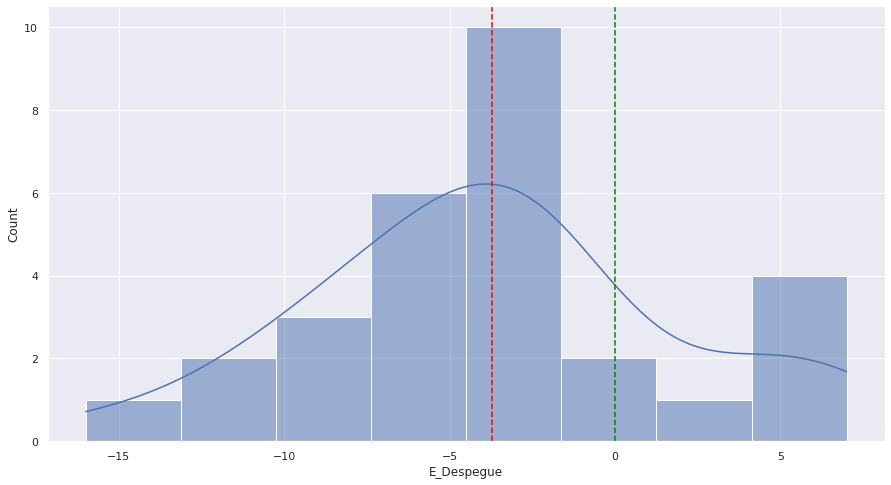

In [266]:
ax=sns.histplot(data= df2BarcelonaPuntualida.E_Despegue, kde= True)

ax.axvline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')


# creamos los LAGs

In [267]:
#Creamos los LAGs

df= df.sort_values(['DATE', 'REG', 'STD'])


df[f'lag_STD']= df['STD'].shift(periods=-1)  
#adecuarFechas('DATE', 'lag_STD')
df[f'lag_ATD']= df['ATD'].shift(periods=-1)  

df[f'lag_STA']= df['STA'].shift(periods=-1)  
#adecuarFechas('DATE', 'lag_STD')
df[f'lag_ATA']= df['ATA'].shift(periods=-1) 

#adecuarFechas('Pasajeros', 'ACT PAX  ')
df[f'lag_ACT PAX']= df['ACT PAX'].shift(periods=-1) 

#Lag de la siguiente secuencia
df[f'lag_Secuencia']= df['Secuencia'].shift(periods=-1) 
df[f'lag_REG']= df['REG'].shift(periods=-1) 

df[['lag_Secuencia', 'lag_REG']]

,lag_Secuencia,lag_REG
0,2.0,EC-JSY
1,3.0,EC-JSY
2,4.0,EC-JSY
3,5.0,EC-JSY
4,6.0,EC-JSY
...,...,...
217,2.0,EC-MKO
218,3.0,EC-MKO
219,4.0,EC-MKO
220,1.0,EC-MKV


# Tiempo en tierra de una avion despues primer salto
##df3 --> Calculo tiempo en tierra

# E. Despegue primer salto de la mañana

In [268]:
df= df.sort_values(['DATE', 'REG', 'STD'])



df['T_teoricoTierra1'] = (df['lag_STD']- df['STA']) /  np.timedelta64(1, 'm')
df['T_RealTierra1'] = (df['lag_ATD']- df['ATA']) /  np.timedelta64(1, 'm')

df['E_tierra1'] = df['T_RealTierra1'] -df['T_teoricoTierra1']

df3=df

print(df3[['FLT', 'Secuencia','STD', 'ATD', 'lag_STD', 'T_teoricoTierra1', 'E_tierra1']][0:4])
print()
print('Media filtrada = ', round(df3['E_tierra1'].mean(),2), 'minutos')


    FLT  Secuencia                 STD                 ATD  \
0  2506        1.0 2022-01-01 07:40:00 2022-01-01 08:00:00   
1  2505        2.0 2022-01-01 09:40:00 2022-01-01 09:51:00   
2  1386        3.0 2022-01-01 11:40:00 2022-01-01 11:40:00   
3  1387        4.0 2022-01-01 13:30:00 2022-01-01 13:23:00   

              lag_STD  T_teoricoTierra1  E_tierra1  
0 2022-01-01 09:40:00              35.0       -4.0  
1 2022-01-01 11:40:00              35.0       -4.0  
2 2022-01-01 13:30:00              40.0       -2.0  
3 2022-01-01 15:15:00              40.0       16.0  

Media filtrada =  18.71 minutos


In [269]:
# Retraso
df['Puntualidad1'] = (df['ATA'] - df['STA']) /  np.timedelta64(1, 'm') 
df['Puntualidad1'].head(3)

0    15.0
1     4.0
2    -5.0
Name: Puntualidad1, dtype: float64

# Calculo Tiempo de carga y descarga de pasajeros:
Cojo solo las segundas secuencias que tengan el siguiente vuelo el mismo REG

In [270]:
# Total pasajeros Boarding

df['Total_PAX_Boarding'] = df['lag_ACT PAX'] +df['ACT PAX']

df['Total_PAX_Boarding'] 

df['T_Medio_Boarding'] = round(df['Total_PAX_Boarding'] / df['T_RealTierra1'],1)
df[['T_Medio_Boarding', 'Total_PAX_Boarding', 'T_RealTierra1']]
#df['T_Medio_Boarding']

,T_Medio_Boarding,Total_PAX_Boarding,T_RealTierra1
0,6.6,206.0,31.0
1,4.4,135.0,31.0
2,2.1,78.0,38.0
3,3.6,202.0,56.0
4,7.5,276.0,37.0
...,...,...,...
217,5.9,328.0,56.0
218,2.7,244.0,89.0
219,5.4,152.0,28.0
220,-0.1,101.0,-701.0


In [271]:
# Calculo de los tiempos de Taxi

df['Taxi_Despegue'] = (df['TKof']-df['ATD']) /  np.timedelta64(1, 'm')
df['Taxi_Aterrizaje'] = (df['ATA']- df['TDwn']) /  np.timedelta64(1, 'm')
df[['Taxi_Despegue', 'Taxi_Aterrizaje']]

,Taxi_Despegue,Taxi_Aterrizaje
0,10.0,3.0
1,12.0,2.0
2,10.0,5.0
3,7.0,3.0
4,16.0,7.0
...,...,...
217,13.0,6.0
218,15.0,4.0
219,16.0,4.0
220,11.0,13.0


# Tiempo de rodadura (En el despegue y en el aterrizaje

# Creamos los LAG siguientes saltos

In [272]:
#df.columns

In [273]:
#Creamos los LAGs
df[f'E_Despegue2']= df['E_Despegue'].shift(periods=-1) 
df[f'E_Despegue3']= df['E_Despegue'].shift(periods=-2) 
df[f'E_Despegue4']= df['E_Despegue'].shift(periods=-3) 

df[f'E_Duracion_Vuelo2']= df['E_Duracion_Vuelo'].shift(periods=-1) 
df[f'E_Duracion_Vuelo3']= df['E_Duracion_Vuelo'].shift(periods=-2) 
df[f'E_Duracion_Vuelo4']= df['E_Duracion_Vuelo'].shift(periods=-3) 

df[f'E_tierra2']= df['E_tierra1'].shift(periods=-1) 
df[f'E_tierra3']= df['E_tierra1'].shift(periods=-2) 
df[f'E_tierra4']= df['E_tierra1'].shift(periods=-3) 

df[f'Aeropuerto_Key2']= df['Aeropuerto_Key'].shift(periods=-1) 
df[f'Aeropuerto_Key3']= df['Aeropuerto_Key'].shift(periods=-2) 
df[f'Aeropuerto_Key4']= df['Aeropuerto_Key'].shift(periods=-3) 

df[f'Puntualidad2']= df['Puntualidad1'].shift(periods=-1) 
df[f'Puntualidad3']= df['Puntualidad1'].shift(periods=-2) 
df[f'Puntualidad4']= df['Puntualidad1'].shift(periods=-3) 

df[f'E_Despegue_Total'] = df[f'E_Despegue'] + df[f'E_Despegue2'] + df[f'E_Despegue3'] + df[f'E_Despegue4']
df[f'E_Duracion_Vuelo_Total'] = df[f'E_Duracion_Vuelo'] + df[f'E_Duracion_Vuelo2'] + df[f'E_Duracion_Vuelo3']   + df[f'E_Duracion_Vuelo4'] 
df[f'E_tierra_Total'] = df[f'E_tierra1'] + df[f'E_tierra2'] + df[f'E_tierra3']    + df[f'E_tierra4']

df['E_acumulado_Total'] = df[f'E_Despegue_Total'] + df[f'E_Duracion_Vuelo_Total'] + df[f'E_tierra_Total'] 


# Estudio en Tierra primer aterrizaje.

[Text(0.5, 1.0, 'Error en Tierra .... con outliers:')]

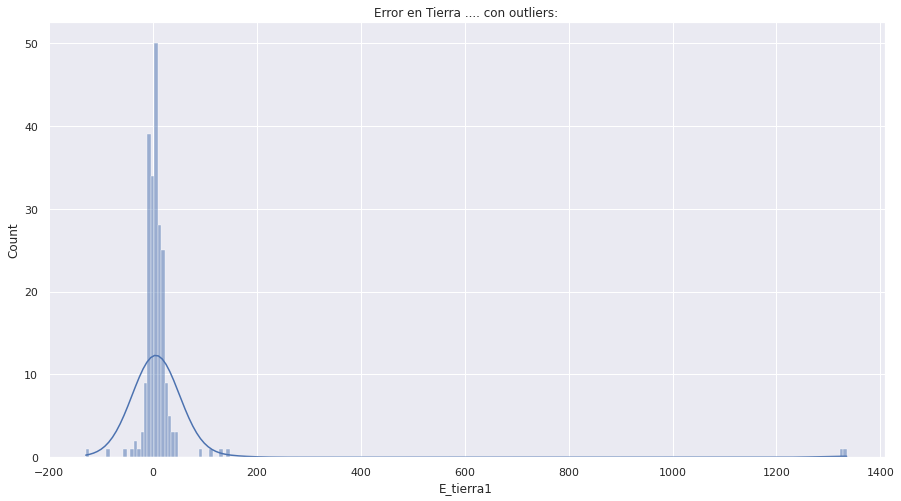

In [274]:
sns.histplot(data= df3.E_tierra1, kde= True).set(title='Error en Tierra .... con outliers:')
 

És clar que hi ha **molts de outiers** i igual que hem fet al primer enlairament, hem de fer als altres moviments de l'avió.


Media filtrada =  4.44 minutos


Text(4.44, 204.44, 'BCN -3.72 minut.')

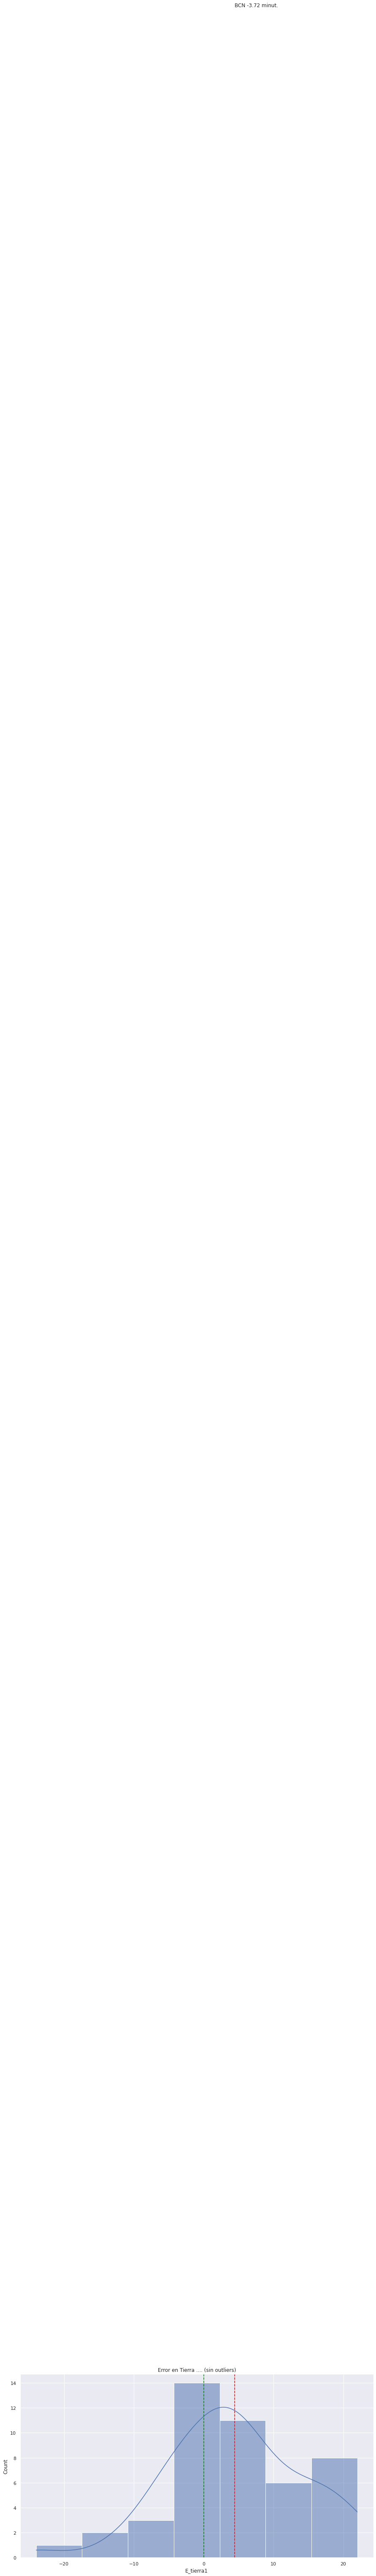

In [275]:
# Eliminar los outliers

#df2=df1
dfEliminarOutliers= ((df3['Secuencia']== 1) & (df3['E_tierra1']< 30) & (df3['E_tierra1']> -30))

df3 = df3[dfEliminarOutliers]
ax = sns.histplot(data= df3.E_tierra1, kde= True)
ax.set_title("Error en Tierra .... (sin outliers)")
print()
print('Media filtrada = ', round(df3['E_tierra1'].mean(),2), 'minutos')

media = round(df3['E_tierra1'].mean(),2)

ax.axvline(media, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')


#textoBCN = "Media "+ str(media) + ' minut.'
ax.text(media  ,media+200  , textoBCN, backgroundcolor='w') 


In [276]:
def porcentajeErrorPPM (df5, accion):
  PPM_0=df5.apply(lambda x: x['E_tierra1'] > 0, axis=1).sum()
  
  #print(df3.shape)
  #print(PPM)

  PorcentajeError_0=round(PPM_0/df3.shape[0]*100,2)
  print("Cantitat d'avions que ", accion," drespre´s de 0 minuts: ", PorcentajeError_0,'%')
  PPM_10=df5.apply(lambda x: x['E_tierra1'] > 10, axis=1).sum()
  PorcentajeError_10=round(PPM_10/df3.shape[0]*100,2)
  print("Cantitat d'avions que ", accion," drespre´s de 10 minuts: ", PorcentajeError_10,'%')


print(porcentajeErrorPPM( df3, 'arriven'))

Cantitat d'avions que  arriven  drespre´s de 0 minuts:  71.11 %
Cantitat d'avions que  arriven  drespre´s de 10 minuts:  24.44 %
None


In [277]:
# Crear Subgrupos de tiempo de boarding:
'''
df3['t_boarding'] = pd.cut(df3['T_teoricoTierra1'], bins = [ -9000,0, 41, 46,51,60,100000], labels=['NEGATIVOS',
                                                                                              '1.- >0 & <=41',
                                                                                              '2.- >42 & <=46',
                                                                                              '3.- >47 & <51',
                                                                                              '4.- >52 & <60',
                                                                                              '5.- >61'])
'''

df3['t_boarding'] = pd.cut(df3['T_teoricoTierra1'], bins = [ -9000, 0, 39, 40, 45, 50, 55, 60, 100000], labels=['NEGATIVOS',
                                                                                                          
                                                                                                          '1.- <40',
                                                                                                          '2.- 40',
                                                                                                          '3.- 45',
                                                                                                          '4.- 50',
                                                                                                          '5.- 55',
                                                                                                          '6.- 60', 
                                                                                                          '7.- >60'])
df3[['T_teoricoTierra1', 't_boarding']].head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,T_teoricoTierra1,t_boarding
0,35.0,1.- <40
6,40.0,2.- 40
12,40.0,2.- 40
16,35.0,1.- <40
21,55.0,5.- 55


In [278]:
# Para saber error primer boarding solo de Barcelona

barcelonaTierra = (df3['ARR']== 'BCN')

df4BarcelonaTierra = df3[barcelonaTierra]
df4BarcelonaTierra .head()
df4BarcelonaTierraError  = round((df4BarcelonaTierra ['E_tierra1'].mean()),2)
print('\nError en el aterrizaje de Barcelona ', df4BarcelonaTierraError, 'minuts de mitjana')


Error en el aterrizaje de Barcelona  -4.5 minuts de mitjana


Text(0.5, 1.0, 'Error primer t. BOARDING principales aeropuertos:')

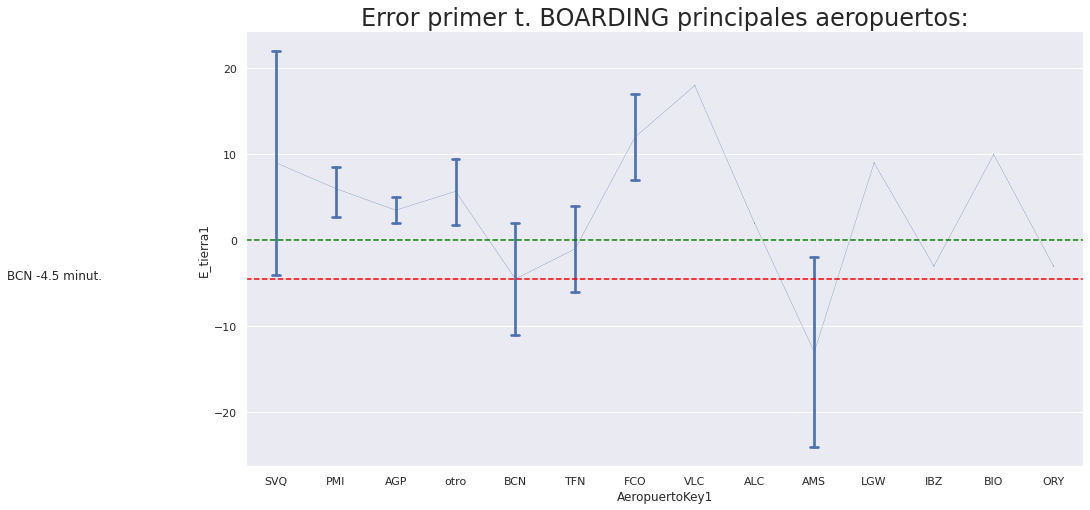

In [279]:
# Intervalos de Confianza por aeropuerto

sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='AeropuertoKey1', y = "E_tierra1", data= df3, scale=.1, kind = "point", capsize=0.13)

ax.axhline(df4BarcelonaTierraError , color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN "+ str(df4BarcelonaTierraError) + ' minut.'
ax.text(df4BarcelonaTierraError  ,df4BarcelonaTierraError  , textoBCN, backgroundcolor='w')

ax.set_title('Error primer t. BOARDING principales aeropuertos:', fontsize = 24)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: ignored

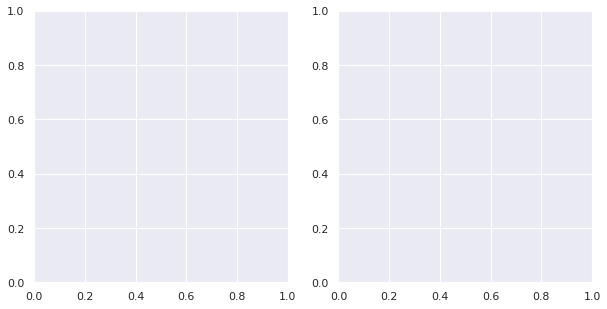

In [280]:
# Quiero hacer el subplot
# No me funciona

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
index = 0

df_Aeropuertos
df_AeropuertosLista =df_Aeropuertos['AeropuertoKey1'].unique()
for k,v in enumerate(df_AeropuertosLista):
  df8=df3[df3['AeropuertoKey1']== v]
  sns.distplot(df8['AeropuertoKey1'], ax=axs[index])
  index += 1
  print(k, v, df8)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [281]:
df4BarcelonaTierra .head()

,DATE,FLT,REG,AC,DEP,ARR,STD,STA,TKof,TDwn,...,Aeropuerto_Key3,Aeropuerto_Key4,Puntualidad2,Puntualidad3,Puntualidad4,E_Despegue_Total,E_Duracion_Vuelo_Total,E_tierra_Total,E_acumulado_Total,t_boarding
21,2022-01-01,3909,EC-KDX,320,PMI,BCN,2022-01-01 17:35:00,2022-01-01 18:30:00,2022-01-01 17:45:00,2022-01-01 18:22:00,...,otro,BCN,-9.0,-6.0,-14.0,-23.0,-5.0,0.0,-28.0,5.- 55
42,2022-01-01,2114,EC-LLM,320,AGP,BCN,2022-01-01 07:40:00,2022-01-01 09:15:00,2022-01-01 07:55:00,2022-01-01 09:09:00,...,SVQ,BCN,-11.0,-21.0,-11.0,-20.0,-26.0,19.0,-27.0,3.- 45


In [282]:
# Contabilizar elementos por grupo de boarding
df5= df3['t_boarding'].value_counts()
#df5['t_boarding']= df5.sort_values('t_boarding')
df5.head()
df5

1.- <40      15
2.- 40       15
3.- 45        7
7.- >60       4
4.- 50        2
5.- 55        2
NEGATIVOS     0
6.- 60        0
Name: t_boarding, dtype: int64

Text(0.5, 1.0, 'Error boarding BCN:')

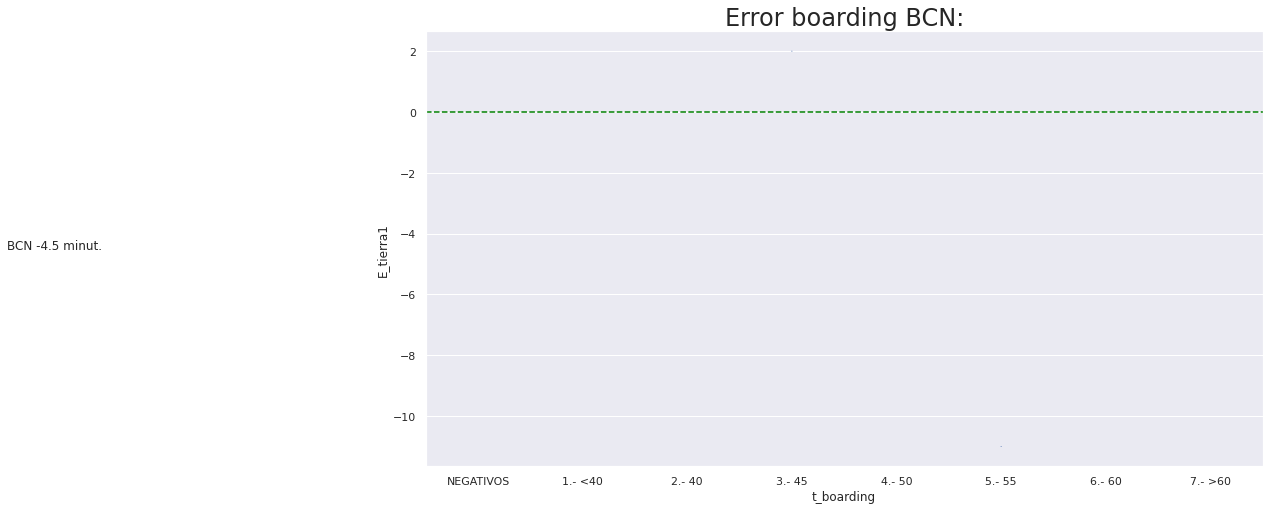

In [283]:
# Intervalos de Confianza por grupo de boarding.

sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='t_boarding', y = "E_tierra1", data= df4BarcelonaTierra, scale=.1, kind = "point", capsize=0.13)

#ax.axhline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN "+ str(df4BarcelonaTierraError) + ' minut.'
ax.text(df4BarcelonaTierraError  ,df4BarcelonaTierraError  , textoBCN, backgroundcolor='w')

ax.set_title('Error boarding BCN:', fontsize = 24)

# Guardar a EXCEL

In [284]:
# Borro las columnas que no me interesan.
guardar = 'No'

'''
borrarColumnas = ['C1', 'DLY1', 'C2', 'DLY2',
       'C3', 'DLY3', 'C4', 'DLY4', 'C2A', 'DLY2A', 'C1Des', 'C2Des', 'C3Des',
       'C4Des', 'CADes', 'ID', 'STAND', 'MSN']
df3 = df3.drop(borrarColumnas, axis=1)
'''

"\nborrarColumnas = ['C1', 'DLY1', 'C2', 'DLY2',\n       'C3', 'DLY3', 'C4', 'DLY4', 'C2A', 'DLY2A', 'C1Des', 'C2Des', 'C3Des',\n       'C4Des', 'CADes', 'ID', 'STAND', 'MSN']\ndf3 = df3.drop(borrarColumnas, axis=1)\n"

In [285]:
df3.columns

Index(['DATE', 'FLT', 'REG', 'AC', 'DEP', 'ARR', 'STD', 'STA', 'TKof', 'TDwn',
       'ATD', 'ATA', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX', 'LF',
       'Taxi-out', 'Taxi-In', 'SLOT', 'C1', 'DLY1', 'Sub1', 'C2', 'DLY2',
       'Sub2', 'C3', 'DLY3', 'Sub3', 'C4', 'DLY4', 'Sub4', 'C1Arr', 'DLY1Arr',
       'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2',
       'Secuencia', 'MES', 'Aeropuerto_Key', 'AeropuertoKey1',
       'DuracionVueloTeorico', 'DuracionVueloReal', 'E_Duracion_Vuelo',
       't_ClosePax', 't_Close_Cargo_Door', 't_Entre_Puertas',
       'Retardo_Abrir_Puerta_Pax', 'Trayecto', 'E_Despegue', 'lag_STD',
       'lag_ATD', 'lag_STA', 'lag_ATA', 'lag_ACT PAX', 'lag_Secuencia',
       'lag_REG', 'T_teoricoTierra1', 'T_RealTierra1', 'E_tierra1',
       'Puntualidad1', 'Total_PAX_Boarding', 'T_Medio_Boarding',
       'Taxi_Despegue', 'Taxi_Aterrizaje', 'E_Despegue2', 'E_Despegue3',
      

In [286]:
# Guardar excel
if guardar != 'No':
  nombreFichero = "D:\Documentos D\02.- Datos Vueling\Vueling_Python_MAR_JMML_" + Hoja + ".xlsx"

  df3.to_excel(nombreFichero)
  print()
  print('Guardado fichero : ', nombreFichero)
  print()
else:
  print('No guardado')

No guardado


In [287]:
# Pruebo esta manera de guardar el fichero EXCEL en DRIVE
# Cuidado que la hora no coincide con la del ordenador

if guardar != 'No':

  #Save only the first secuence.
  from datetime import datetime
  fecha=datetime.now()

  dfRegistros1= (df3['Secuencia']== 1) 

  df7 = df3[dfRegistros1]

  path = '/content/drive/MyDrive/Ficheros de Vueling' + '/' + str(fecha) +' '+ Hoja + ".xlsx"
  #df5.to_excel(r"D:\Documentos D\02.- Datos Vueling\Vueling_Python_MAR_Vuelo_" + Hoja + ".xlsx")

  df7.to_excel(path)
  print()
  print('Guardado fichero :' , path)
  print()
  print()
else:
  print('No guardado')

No guardado


In [288]:
df7.columns

Index(['DATE', 'FLT', 'REG', 'AC', 'DEP', 'ARR', 'STD', 'STA', 'TKof', 'TDwn',
       'ATD', 'ATA', 'BLOCK', 'FLThr', 'DStand', 'AStand', 'ACT PAX', 'LF',
       'Taxi-out', 'Taxi-In', 'SLOT', 'C1', 'DLY1', 'Sub1', 'C2', 'DLY2',
       'Sub2', 'C3', 'DLY3', 'Sub3', 'C4', 'DLY4', 'Sub4', 'C1Arr', 'DLY1Arr',
       'Close Pax Door', 'Close Cargo Door', 'Open Cargo/Pax Door',
       'close pax door2', 'close cargo door2', 'open cargo/pax door2',
       'Secuencia', 'MES', 'Aeropuerto_Key', 'AeropuertoKey1',
       'DuracionVueloTeorico', 'DuracionVueloReal', 'E_Duracion_Vuelo',
       't_ClosePax', 't_Close_Cargo_Door', 't_Entre_Puertas',
       'Retardo_Abrir_Puerta_Pax', 'Trayecto', 'E_Despegue', 'lag_STD',
       'lag_ATD', 'lag_STA', 'lag_ATA', 'lag_ACT PAX', 'lag_Secuencia',
       'lag_REG', 'T_teoricoTierra1', 'T_RealTierra1', 'E_tierra1',
       'Puntualidad1', 'Total_PAX_Boarding', 'T_Medio_Boarding',
       'Taxi_Despegue', 'Taxi_Aterrizaje', 'E_Despegue2', 'E_Despegue3',
      

In [289]:
print('forma ',df3.shape)


forma  (45, 89)


# Estudio de la duracion del vuelo

In [290]:
# Identifico los Aeropuertos principales.


path =(r"/content/drive/MyDrive/Vueling_Trayectos_Duracion_Vuelo.xlsx")
 
#df_Aeropuertos = pd.read_excel(path, sheet_name='Aeropuertos')

#path =(r"D:\Documentos D\02.- Datos Vueling\Vueling_Trayectos_Duracion_Vuelo.xlsx")


df_Trayectos = pd.read_excel(path, sheet_name='Trayectos')
df_Trayectos = df_Trayectos.drop(['Borrar'], axis=1)
df_Trayectos.head(6)

,Trayecto,grupoTrayecto
0,BCN-PMI,BCN-PMI
1,BCN-SVQ,BCN-SVQ
2,BCN-ORY,BCN-ORY
3,BCN-IBZ,BCN-IBZ
4,BCN-BIO,BCN-BIO
5,AGP-BCN,AGP-BCN


Creo la variable trayecte para identificar que trayectes tinc. Com un avió va de DEp (departure) a ARR (arival), per identificr les trayectories me es igual els trayectes DEP a ARR que si va de ARR a DEp. Vull dir per example
de BCN a MAD es la mateixa distancai que des de MAD a BCN.

aquesta nova variable li diré 

In [311]:
def trajecte(df):
    
    if ( df['DEP']<df['ARR']):
        return (df['DEP'] +' - '+ df['ARR'])
    elif (df['DEP']>df['ARR']):
        return (df['ARR'] +' - '+ df['DEP'])

df['Trajecto'] = df.apply(trajecte, axis = 1)
df[['DEP','ARR','Trayecto']].head(3)


,DEP,ARR,Trayecto
0,BIO,SVQ,BIO-SVQ
1,SVQ,BIO,BIO-SVQ
2,BIO,SCQ,BIO-SCQ



Media filtrada =  5.81 minutos


Text(5.81, 205.81, 'BCN -4.5 minut.')

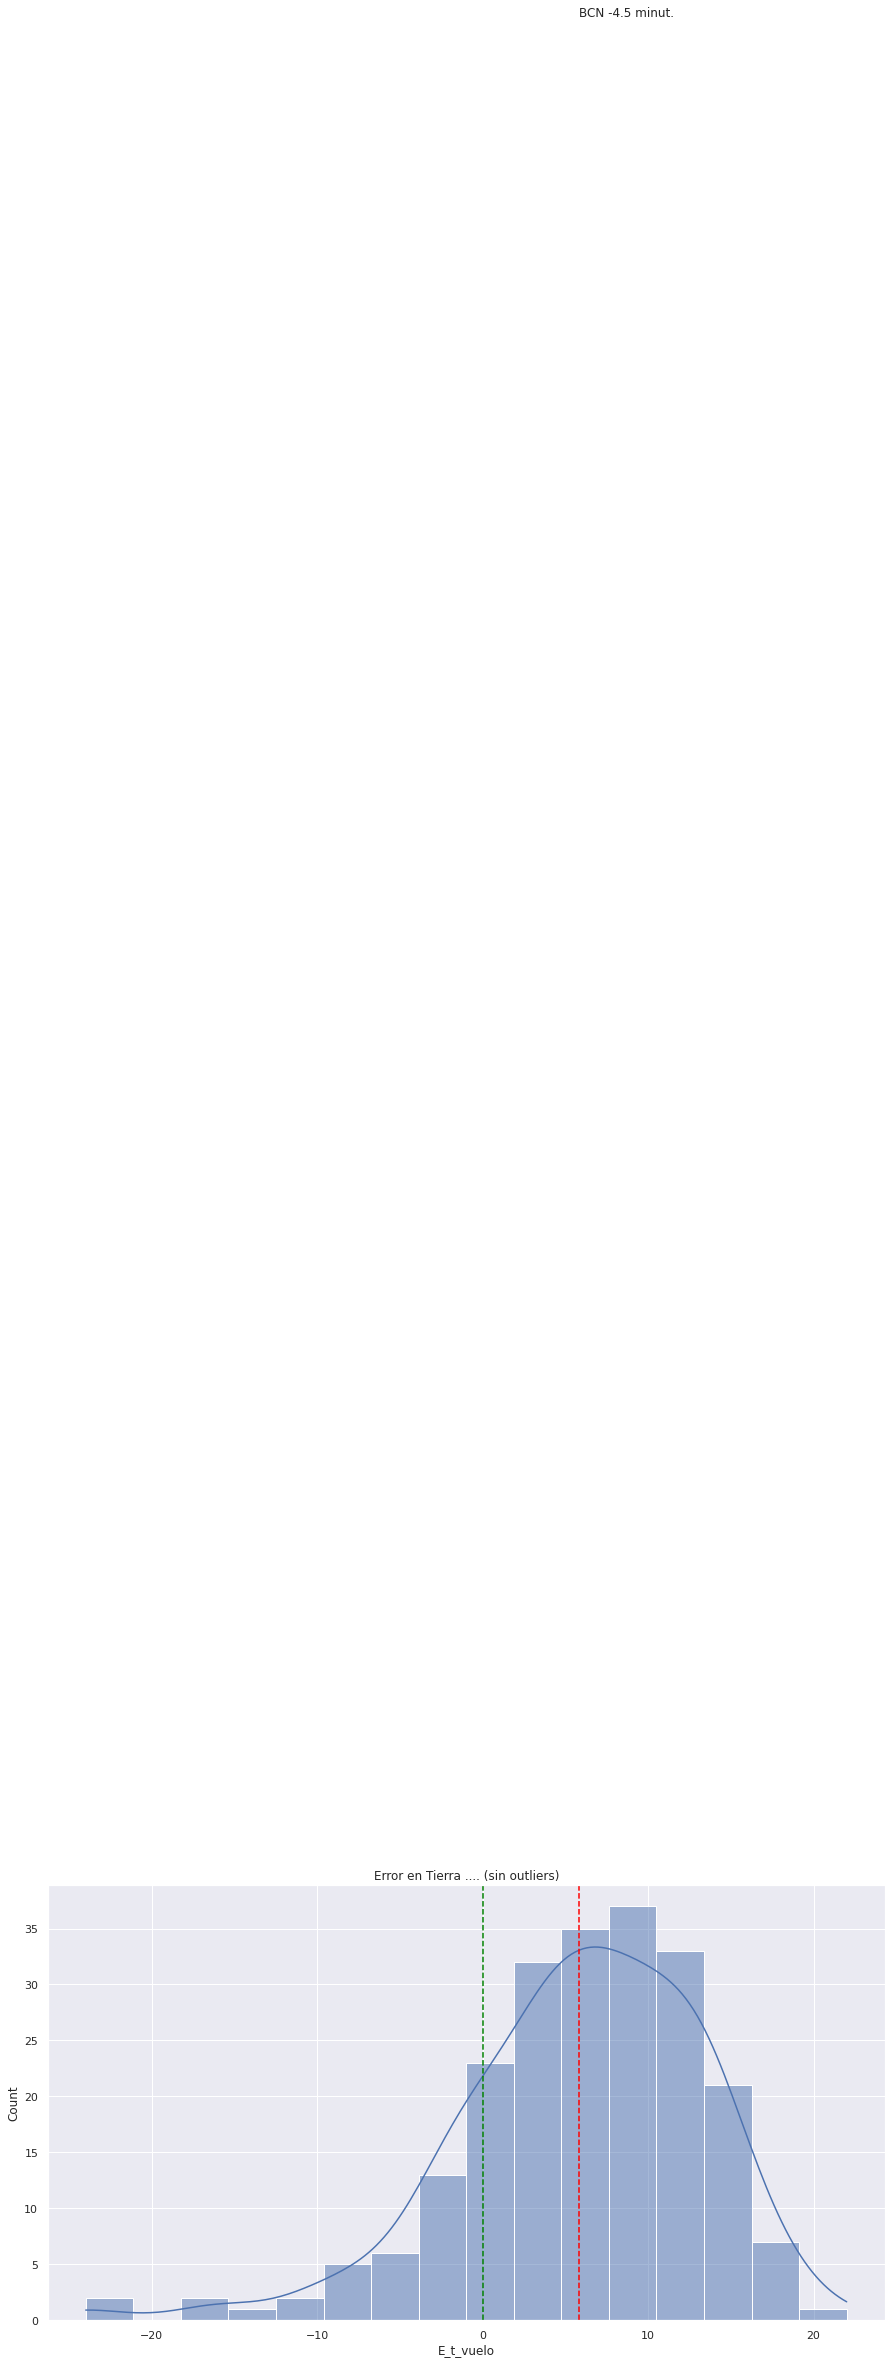

In [359]:
# erro en el tiempode vuelo
df8=df
df8['E_t_vuelo']= ((df8['STA']-df8['STD']) -(df8['ATA']-df8['ATD']))/  np.timedelta64(1, 'm') 
dfEliminarOutliers= (df8['E_t_vuelo']< 30) & (df8['E_t_vuelo']> -30)
df8 = df8[dfEliminarOutliers]
df8['E_t_vuelo']
ax = sns.histplot(data= df8.E_t_vuelo, kde= True)
ax.set_title("Error en Tierra .... (sin outliers)")
print()
print('Media filtrada = ', round(df8['E_t_vuelo'].mean(),2), 'minutos')

media = round(df8['E_t_vuelo'].mean(),2)

ax.axvline(media, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')


#textoBCN = "Media "+ str(media) + ' minut.'
ax.text(media  ,media+200  , textoBCN, backgroundcolor='w')

In [316]:
# Repasar tiempo cálculo vuelo avion:

#df['E_t_vuelo']= ((df['STA']-df['STD']) -(df['ATA']-df['ATD']))
#convertirTiempo('E_t_vuelo')
#df[['ATA','STD','E_t_vuelo']].head(3)
#df3 = df3[dfEliminarOutliers]

df.head(3)
'''
ax = sns.histplot(data= df.E_t_vuelo, kde= True)
ax.set_title("Error en Tierra .... (sin outliers)")
print()
print('Media filtrada = ', round(df3['E_t_vuelo'].mean(),2), 'minutos')

media = round(df3['E_t_vuelo'].mean(),2)
'''

'\nax = sns.histplot(data= df.E_t_vuelo, kde= True)\nax.set_title("Error en Tierra .... (sin outliers)")\nprint()\nprint(\'Media filtrada = \', round(df3[\'E_t_vuelo\'].mean(),2), \'minutos\')\n\nmedia = round(df3[\'E_t_vuelo\'].mean(),2)\n'

In [293]:
# Solo escojo los datos que necesito para el calculo volando
'''
df.columns
df5 = df
borrarColumnas = ['Leg Code', 'Total DLY Dep', 'Close Pax Door',
                  'Close Cargo Door', 'Open Cargo/Pax Door', 'Stand Dep', 'Stand Arr',
                  'lag_STD', 'lag_ATD','t_ClosePax', 't_Close_Cargo_Door','T_teoricoTierra1',
                  'T_RealTierra1', 't_Entre_Puertas']

df5 = df5.drop(borrarColumnas, axis=1)
df5.head(1)
'''

"\ndf.columns\ndf5 = df\nborrarColumnas = ['Leg Code', 'Total DLY Dep', 'Close Pax Door',\n                  'Close Cargo Door', 'Open Cargo/Pax Door', 'Stand Dep', 'Stand Arr',\n                  'lag_STD', 'lag_ATD','t_ClosePax', 't_Close_Cargo_Door','T_teoricoTierra1',\n                  'T_RealTierra1', 't_Entre_Puertas']\n\ndf5 = df5.drop(borrarColumnas, axis=1)\ndf5.head(1)\n"

In [294]:
# Agrupo por Trayecto

df5 = df

df5 = pd.merge(df5, df_Trayectos, left_on='Trayecto', right_on='Trayecto')


df5 = df5.sort_values(['DATE', 'REG', 'STD'])
df5 = df5.reset_index(drop=True) 
df5.head(3)

,DATE,FLT,REG,AC,DEP,ARR,STD,STA,TKof,TDwn,...,Puntualidad2,Puntualidad3,Puntualidad4,E_Despegue_Total,E_Duracion_Vuelo_Total,E_tierra_Total,E_acumulado_Total,Trajecto,E_t_vuelo,grupoTrayecto
0,2022-01-01,2506,EC-JSY,320,BIO,SVQ,2022-01-01 07:40:00,2022-01-01 09:05:00,2022-01-01 08:10:00,2022-01-01 09:17:00,...,4.0,-5.0,-24.0,24.0,-34.0,6.0,-4.0,BIO - SVQ,0 days 00:05:00,otro
1,2022-01-01,2505,EC-JSY,320,SVQ,BIO,2022-01-01 09:40:00,2022-01-01 11:05:00,2022-01-01 10:03:00,2022-01-01 11:07:00,...,-5.0,-24.0,-6.0,-4.0,-27.0,12.0,-19.0,BIO - SVQ,0 days 00:07:00,otro
2,2022-01-01,1386,EC-JSY,320,BIO,SCQ,2022-01-01 11:40:00,2022-01-01 12:50:00,2022-01-01 11:50:00,2022-01-01 12:40:00,...,-24.0,-6.0,-2.0,-19.0,-18.0,0.0,-37.0,BIO - SCQ,0 days 00:05:00,otro


In [295]:
#Save only the first secuence.
from datetime import datetime
fecha=datetime.now()

dfRegistros1= (df5['Secuencia']== 1) 

df5 = df5[dfRegistros1]

path = '/content/drive/MyDrive/Ficheros de Vueling' + '/' + str(fecha) +' '+ Hoja + ".xlsx"
#df5.to_excel(r"D:\Documentos D\02.- Datos Vueling\Vueling_Python_MAR_Vuelo_" + Hoja + ".xlsx")

df5.to_excel(path)
print()
print('Guardado fichero :' , path)
print()


Guardado fichero : /content/drive/MyDrive/Ficheros de Vueling/2022-09-19 09:34:34.779788 FLT_2022.xlsx



/content/drive/MyDrive/Ficheros de Vueling

# Estudio de los tiempos de TAXI


In [296]:
df[['Taxi_Despegue', 'Taxi_Aterrizaje']]

,Taxi_Despegue,Taxi_Aterrizaje
0,10.0,3.0
1,12.0,2.0
2,10.0,5.0
3,7.0,3.0
4,16.0,7.0
...,...,...
217,13.0,6.0
218,15.0,4.0
219,16.0,4.0
220,11.0,13.0



Media =  13.37 minutos


Text(0.5, 1.0, 'Tiempo de Radadura Takeoff')

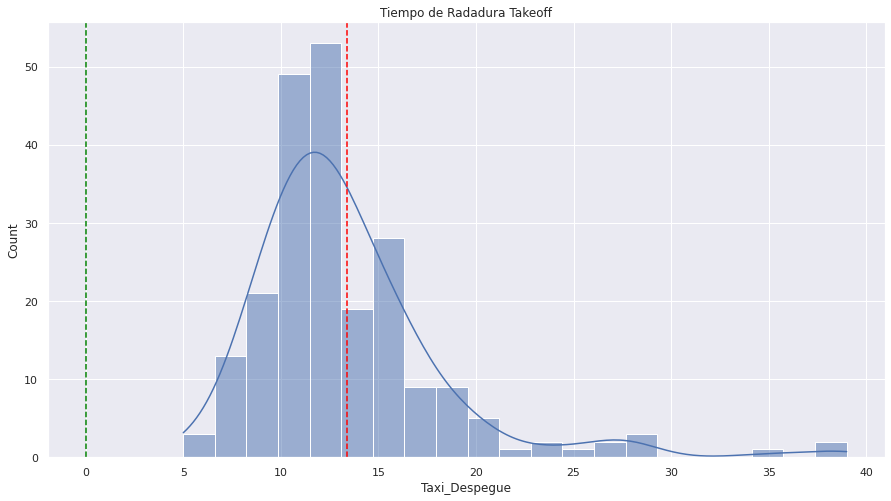

In [297]:
# Taxi Despegue:
dfEliminarOutliers= ((df['Taxi_Despegue'] <40) & (df['Taxi_Despegue'] >0))

df3 = df[dfEliminarOutliers]

ax = sns.histplot(data= df3.Taxi_Despegue, kde= True)
print()
print('Media = ', round(df3['Taxi_Despegue'].mean(),2), 'minutos')

media = round(df3['Taxi_Despegue'].mean(),2)

ax.axvline(media, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')
ax.set_title('Tiempo de Radadura Takeoff')


Media =  5.25 minutos


Text(0.5, 1.0, 'Tiempo de rodadura Landing')

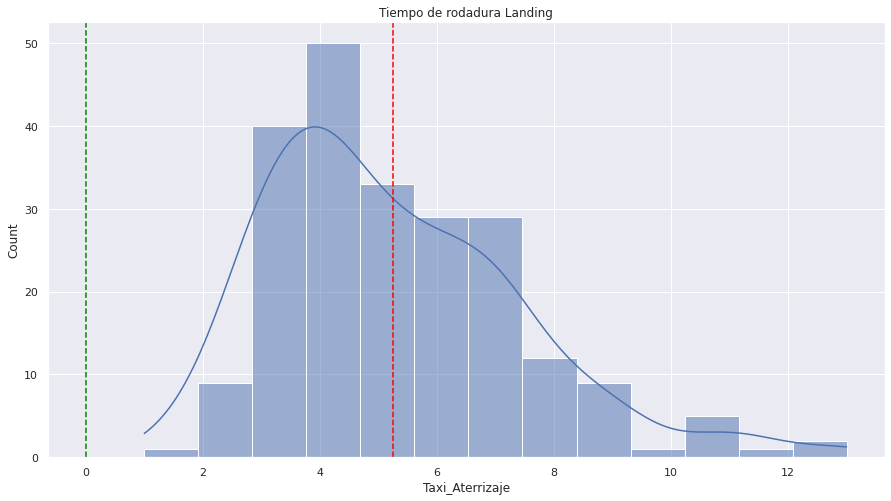

In [298]:
# Taxi Aterrizaje
dfEliminarOutliers= ((df['Taxi_Aterrizaje'] <20) & (df['Taxi_Aterrizaje'] >0))

df3 = df[dfEliminarOutliers] 

ax = sns.histplot(data= df3.Taxi_Aterrizaje, kde= True)
print()
print('Media = ', round(df3['Taxi_Aterrizaje'].mean(),2), 'minutos')

media = round(df3['Taxi_Aterrizaje'].mean(),2)

ax.axvline(media, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')
ax.set_title('Tiempo de rodadura Landing')

# Cantidad de tiempo que tardamos en vaciar y llenar un avion.

In [299]:
# Estudio la cantidad de tiempo que tardamos en vaciar y llenar un avion.

dfEliminarOutliers= ((df['REG'] == df['lag_REG']))

df3 = df[dfEliminarOutliers] 
df3['Total_Pasajeros_Boarding']= df3['ACT PAX'] +df3['lag_ACT PAX']

df3['t_Boarding_X_Pasajero'] = round((df3['Total_Pasajeros_Boarding']/ df3['T_RealTierra1']),2)

df3[4:10][['REG', 
           'lag_REG',
           'Total_Pasajeros_Boarding', 
           'ACT PAX', 'lag_ACT PAX',
           't_Boarding_X_Pasajero', 
           'T_Medio_Boarding']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,REG,lag_REG,Total_Pasajeros_Boarding,ACT PAX,lag_ACT PAX,t_Boarding_X_Pasajero,T_Medio_Boarding
4,EC-JSY,EC-JSY,276.0,155,121.0,7.46,7.5
6,EC-JZI,EC-JZI,175.0,57,118.0,3.89,3.9
7,EC-JZI,EC-JZI,241.0,118,123.0,5.36,5.4
8,EC-JZI,EC-JZI,123.0,123,0.0,4.24,4.2
9,EC-JZI,EC-JZI,125.0,0,125.0,3.05,3.0
10,EC-JZI,EC-JZI,219.0,125,94.0,6.44,6.4



Media =  4.27 minutos


Text(0.5, 1.0, 'Cuantos pasajeros descargamos en un minuto')

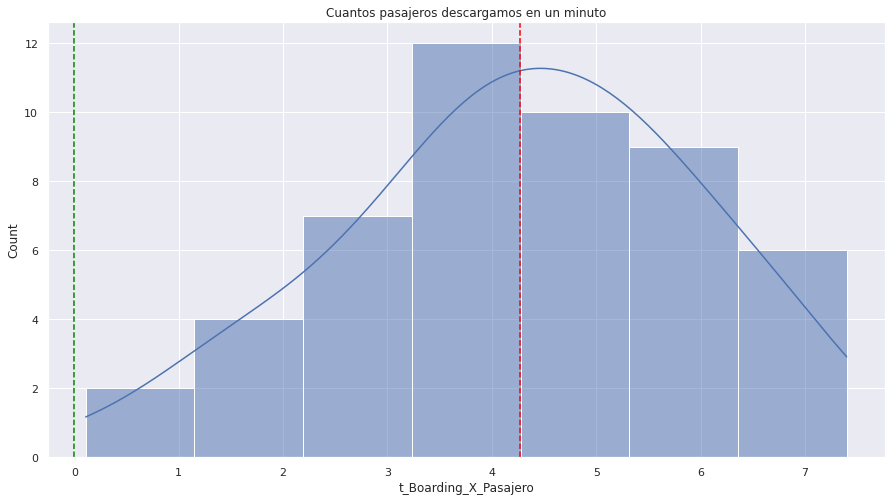

In [300]:
# Taxi Aterrizaje
dfEliminarOutliers= ((df3['t_Boarding_X_Pasajero'] <20) & 
                     (df3['t_Boarding_X_Pasajero'] >-10) & 
                     (df3['Secuencia'] ==1))

df3 = df3[dfEliminarOutliers] 
variableHistograma = 't_Boarding_X_Pasajero'
ax = sns.histplot(data= df3.t_Boarding_X_Pasajero, kde= True)
print()
print('Media = ', round(df3[variableHistograma].mean(),2), 'minutos')

media = round(df3[variableHistograma].mean(),2)

ax.axvline(media, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')
ax.set_title('Cuantos pasajeros descargamos en un minuto')

Text(0.5, 1.0, 'Cuantos pasajeros descargamos en un minuto por Aeropuerto:')

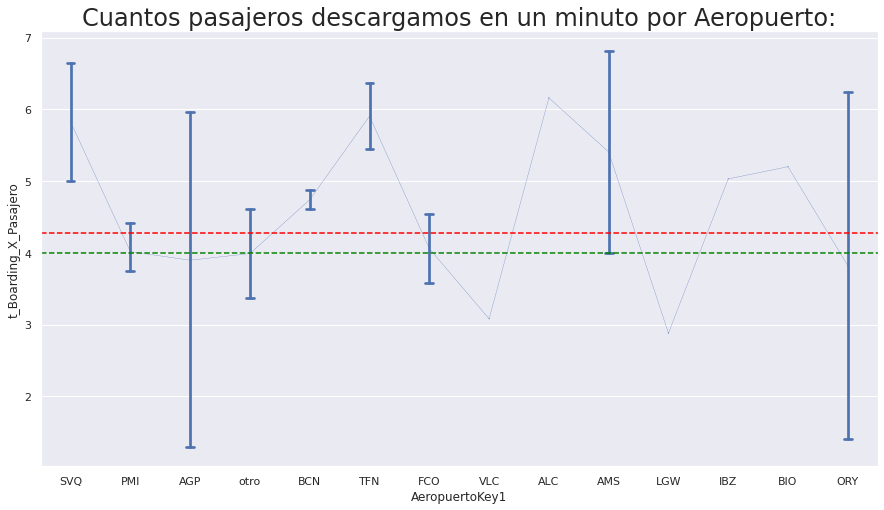

In [301]:
# Intervalos de Confianza por aeropuerto
sns.set_theme(style="darkgrid")
 
sns.set(rc = {'figure.figsize':(15,8)})  

# Tamaño de la imagen
ax = sns.pointplot(x='AeropuertoKey1', y = 't_Boarding_X_Pasajero', data= df3, scale=.1, kind = "point", capsize=0.13)

ax.axhline(media, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(4, color="green", linestyle = '--')


#textoBCN = "BCN "+ str(puntualidadBCN) + ' minut.'
#ax.text(puntualidadBCN ,puntualidadBCN , textoBCN, backgroundcolor='w')

ax.set_title('Cuantos pasajeros descargamos en un minuto por Aeropuerto:', fontsize = 24)

In [302]:
df3['Secuencia']

0      1.0
6      1.0
12     1.0
16     1.0
21     1.0
24     1.0
29     1.0
34     1.0
36     1.0
42     1.0
49     1.0
53     1.0
57     1.0
62     1.0
66     1.0
73     1.0
77     1.0
79     1.0
84     1.0
88     1.0
92     1.0
96     1.0
100    1.0
106    1.0
108    1.0
112    1.0
116    1.0
120    1.0
124    1.0
130    1.0
136    1.0
140    1.0
142    1.0
146    1.0
150    1.0
154    1.0
160    1.0
162    1.0
166    1.0
172    1.0
174    1.0
178    1.0
181    1.0
186    1.0
192    1.0
198    1.0
203    1.0
207    1.0
211    1.0
217    1.0
Name: Secuencia, dtype: float64

# Estudio del SLOT

In [303]:
# Calculo el tiempo que hay de diferente entre SLOT v STD
df3= df.copy()
dfEliminarOutliers= ((df3['E_Despegue'] >20) &(df3['DEP'] =='BCN'))

df3 = df3[dfEliminarOutliers] 


#df3['E_SLOT']= df3['SLOT']-df3['STD']
df3[[ 'SLOT', 'STD', 'ATD', 'E_Despegue', 'DEP']]

,SLOT,STD,ATD,E_Despegue,DEP
91,,2022-01-01 19:05:00,2022-01-01 20:33:00,88.0,BCN
94,,2022-01-01 15:25:00,2022-01-01 15:47:00,22.0,BCN
106,,2022-01-01 17:30:00,2022-01-01 19:48:00,138.0,BCN
178,06:46:00,2022-01-01 06:00:00,2022-01-01 06:31:00,31.0,BCN
219,,2022-01-01 17:55:00,2022-01-01 18:23:00,28.0,BCN


# Estudio LF

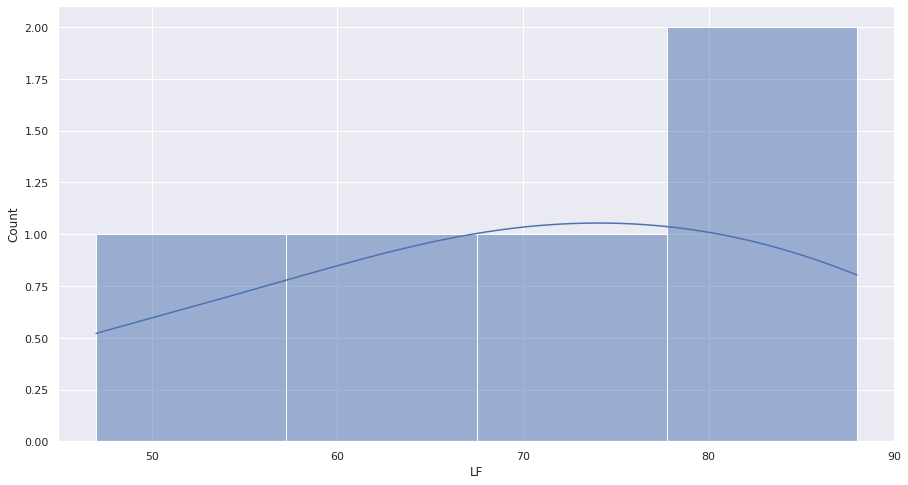

In [304]:
df['LF']
ax = sns.histplot(data= df3.LF, kde= True)

# Etudio tiempo desde que aterriza hasta que se abre la puerta cargo y PAX

In [305]:
df3=df.copy()

df3['retardoOperturaPuertaAterrizaje']=(df['Open Cargo/Pax Door']-df['ATA'])  /  np.timedelta64(1, 'm') 
df3[['retardoOperturaPuertaAterrizaje','Open Cargo/Pax Door', 'ATA']]

,retardoOperturaPuertaAterrizaje,Open Cargo/Pax Door,ATA
0,3.0,2022-01-01 09:23:00,2022-01-01 09:20:00
1,2.0,2022-01-01 11:11:00,2022-01-01 11:09:00
2,1.0,2022-01-01 12:46:00,2022-01-01 12:45:00
3,1.0,2022-01-01 14:12:00,2022-01-01 14:11:00
4,0.0,2022-01-01 18:14:00,2022-01-01 18:14:00
...,...,...,...
217,0.0,2022-01-01 13:51:00,2022-01-01 13:51:00
218,2.0,2022-01-01 16:56:00,2022-01-01 16:54:00
219,1.0,2022-01-01 20:20:00,2022-01-01 20:19:00
220,0.0,2022-01-01 22:38:00,2022-01-01 22:38:00


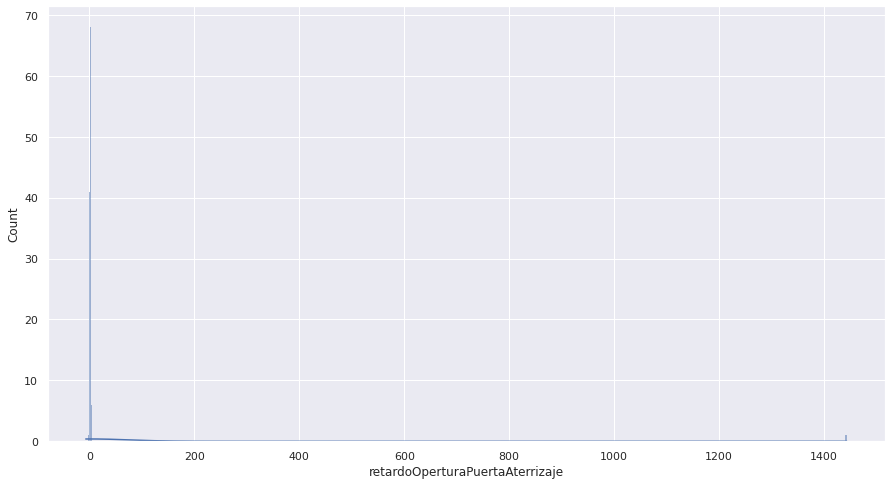

In [306]:
ax = sns.histplot(data= df3.retardoOperturaPuertaAterrizaje, kde= True)